In [5]:
import numpy as np
import scipy as sp
import pandas as pd
import sklearn as skl
from sklearn import *
from copy import deepcopy
import os
import os.path as op
import sys
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import progressbar
progressbar.streams.flush()

loc = 'laptop'
if loc == 'laptop':
    sys.path.insert(0, '/Users/sammichekroud/Desktop/postdoc/student_projects/EffortDifficulty/analysis/tools')
    wd = '/Users/sammichekroud/Desktop/postdoc/student_projects/EffortDifficulty'
elif loc == 'workstation':
    sys.path.insert(0, 'C:/Users/sammirc/Desktop/postdoc/student_projects/EffortDifficulty/analysis/tools')
    wd = 'C:/Users/sammirc/Desktop/postdoc/student_projects/EffortDifficulty' #workstation wd

from funcs import getSubjectInfo
import TuningCurveFuncs

os.chdir(wd)
subs = np.array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39])

#set params for what file to load in per subject
binstep  = 4 
binwidth = 11

#if you want to crop and model reduced number of time points
crop_data = True
tmin, tmax = -0.3, 1.3
times = np.round(np.load(op.join(wd, 'data', 'tuningcurves', 'times.npy')), decimals=2)
if crop_data:
    tinds = np.logical_and(np.greater_equal(times, tmin), np.less_equal(times, tmax))
    times = times[tinds]
ntimes = times.size

smooth_alphas = True
#set up some strings to make sure that we read in the right info, if looking at data with alpha smoothing
if smooth_alphas:
    sigma = 3
elif not smooth_alphas:
    sigma = ''
    
alpha = np.zeros(shape = [subs.size, ntimes]) * np.nan
beta  = np.zeros(shape = [subs.size, ntimes]) * np.nan

subcount = -1
for i in subs:
    subcount += 1
    print(f'working on ppt {subcount+1}/{subs.size}')
    
    a = np.load(op.join(wd, 'data', 'tuningcurves', 'parameter_fits', 'fixedalpha_b1only', f's{i}_ParamFits_Alpha_binstep{binstep}_binwidth{binwidth}_smoothedAlpha_{smooth_alphas}{sigma}_no_bzero.npy'))
    b = np.load(op.join(wd, 'data', 'tuningcurves', 'parameter_fits', 'fixedalpha_b1only', f's{i}_ParamFits_Betas_binstep{binstep}_binwidth{binwidth}_smoothedAlpha_{smooth_alphas}{sigma}_no_bzero.npy'))
    
    if crop_data:
        a = a[:,tinds]
        b = b[:,tinds]
    
    alpha[subcount] = np.nanmean(a, axis=0) #average across trials
    beta[subcount]  = np.nanmean(b, axis=0) #average across trials
    

working on ppt 1/30
working on ppt 2/30
working on ppt 3/30
working on ppt 4/30
working on ppt 5/30
working on ppt 6/30
working on ppt 7/30
working on ppt 8/30
working on ppt 9/30
working on ppt 10/30
working on ppt 11/30
working on ppt 12/30
working on ppt 13/30
working on ppt 14/30
working on ppt 15/30
working on ppt 16/30
working on ppt 17/30
working on ppt 18/30
working on ppt 19/30
working on ppt 20/30
working on ppt 21/30
working on ppt 22/30
working on ppt 23/30
working on ppt 24/30
working on ppt 25/30
working on ppt 26/30
working on ppt 27/30
working on ppt 28/30
working on ppt 29/30
working on ppt 30/30


<font color='#3182bd'>

here we've loaded in the parameter fits from a simplified model:

- across-bin distances are standardised (z-scored) per time point, then a $cos(\alpha * \theta)$ model is fit to estimate the alpha parameter at each time point
    - in this model, alpha is bounded such that $0 < \alpha <= 1$
- the time-course of alpha is smoothed separately for each trial, with a gaussian with a 3 sample (30ms) standard deviation
- this smoothed alpha at each time point is used to fit a second model -- $\beta * cos(\alpha * \theta)$ -- on the demeaned distances at each time point.

this gives rise to a $\beta$ and $\alpha$ parameter per time point per trial

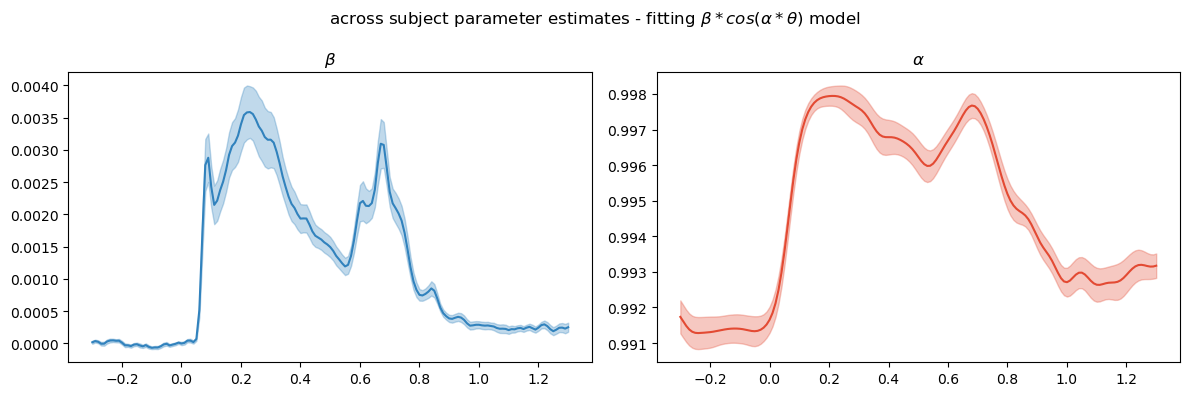

In [6]:
am = np.nanmean(alpha, axis = 0)
bm = np.nanmean(beta,  axis = 0)

asem = sp.stats.sem(alpha, axis=0, ddof=0, nan_policy='omit')
bsem = sp.stats.sem(beta,  axis=0, ddof=0, nan_policy='omit')

fig = plt.figure(figsize = [12, 4])
ax = fig.add_subplot(1,2,1)
ax.plot(times, bm, lw = 1.5, color = '#3182bd', label = '$\\beta$')
ax.fill_between(times, np.add(bm, bsem), np.subtract(bm, bsem),
                edgecolor = None, color = '#3182bd', alpha = 0.3)
ax.set_title('$\\beta$'); #ax.set_ylim([-10,0])

ax = fig.add_subplot(1,2,2)
ax.plot(times, am, lw = 1.5, color = '#e34a33', label = '$\\alpha$')
ax.fill_between(times, np.add(am, asem), np.subtract(am, asem),
                edgecolor = None, color = '#e34a33', alpha = 0.3)
ax.set_title('$\\alpha$')
fig.suptitle(f'across subject parameter estimates - fitting $\\beta * cos(\\alpha * \\theta)$ model')
fig.tight_layout()

<font color='#3182bd'>

we can then visualise these recovered parameter timecourses for each participant, with the grandmean overlaid in black

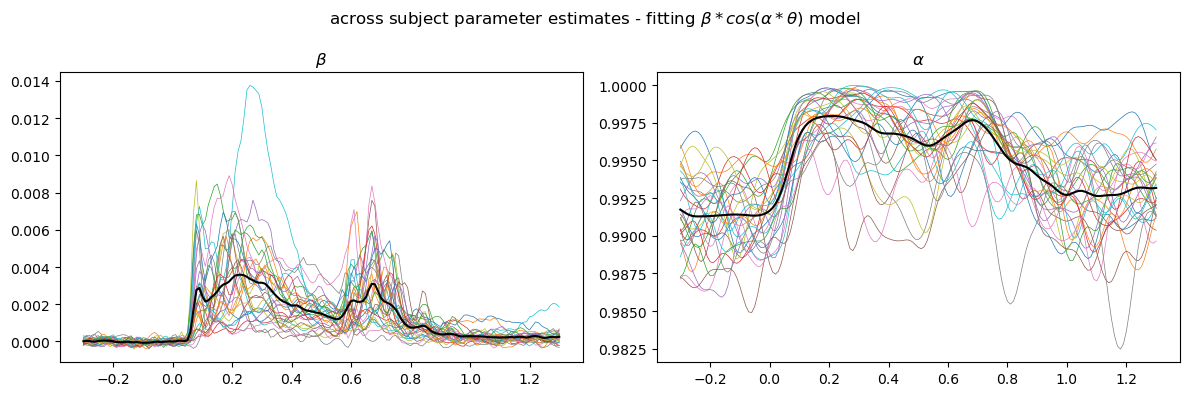

In [8]:
fig = plt.figure(figsize = [12, 4])
ax = fig.add_subplot(1,2,1)
ax.plot(times, beta.T, lw = 0.5)
ax.plot(times, bm, lw = 1.5, color = 'k')
ax.set_title('$\\beta$'); #ax.set_ylim([-10,0])

ax = fig.add_subplot(1,2,2)
ax.plot(times, alpha.T, lw = 0.5)
ax.plot(times, am, lw = 1.5, color = 'k')
ax.set_title('$\\alpha$')
fig.suptitle(f'across subject parameter estimates - fitting $\\beta * cos(\\alpha * \\theta)$ model')
fig.tight_layout()